<a href="https://colab.research.google.com/github/hayesfj/desktop-tutorial/blob/main/Covid_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

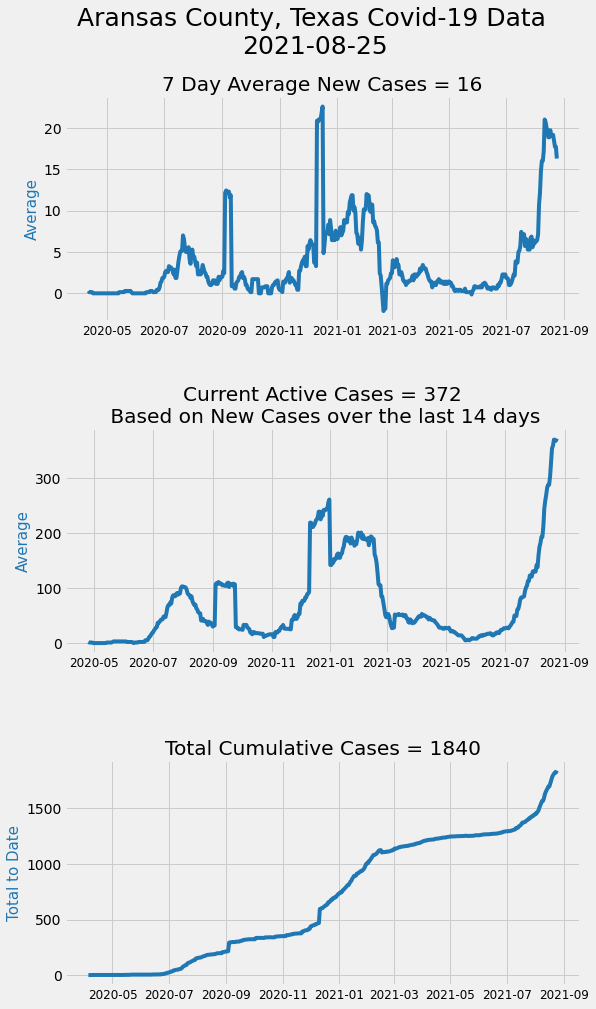

In [ ]:
#This program gets the latest Covid data for a chosen State and County
MYSTATE = "Texas"
MYCOUNTY = "Aransas"

import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter
import numpy as np
from datetime import date

today = date.today()

mydata = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/rolling-averages/us-counties.csv')

countydata = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

# Using an environment variable to filter.  Make sure to put an "@" sign in front of your variable within the string.
localdata = countydata.query('state==@MYSTATE & county==@MYCOUNTY')
#localdata = countydata.query('state=="Texas" & county=="Aransas"')

localdata.to_csv(r'NYTCovidData.csv',index = False)
localdata = pd.read_csv('NYTCovidData.csv')
localdata['New Cases'] = localdata['cases'] - localdata['cases'].shift(1).fillna(0)
localdata['New Deaths'] = localdata['deaths'] - localdata['deaths'].shift(1).fillna(0)
localdata['7 Day Average - New Cases'] = localdata['New Cases'].rolling(7).mean()
localdata['Active'] = localdata['New Cases'].rolling(21).sum()
localdata['date'] = localdata['date'].astype('datetime64')
localdata = localdata.drop(columns=['fips'])  #map location of county

# recent is here in case I only want to get select dates for the dataset
recent=[]
recent = localdata

plt.style.use('fivethirtyeight')
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10, 15))

#fig.subplots_adjust(top=1, wspace=0.3, hspace=0.1)

fig.tight_layout(pad=6)

fig.suptitle(str(MYCOUNTY) + ' County, ' + str(MYSTATE) + ' Covid-19 Data \n' +str(today), fontsize = 25, y=1.0)

x1 = recent['date'] 
y1 = recent['7 Day Average - New Cases']
x2 = recent['date']
y2 = recent['cases']
x3 = recent['date']
y3 = recent['Active']

last_y1 = round(recent['7 Day Average - New Cases'].iloc[-1])
last_y2 = round(recent['cases'].iloc[-1])
last_y3 = round(recent['Active'].iloc[-1])

color = 'tab:blue'
ax1.set_title('7 Day Average New Cases = ' + str(last_y1))
ax1.set_ylabel('Average', color=color, fontsize=15)
ax1.plot(x1, y1, color=color)
ax1.tick_params(axis='x', labelsize=12)

color = 'tab:blue'
ax2.set_title('Current Active Cases = ' + str(last_y3) + '\n Based on New Cases over the last 14 days')
ax2.set_ylabel('Average', color=color, fontsize=15)
ax2.plot(x3, y3, color=color)
ax2.tick_params(axis='x', labelsize=12)
#ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax3.set_title('Total Cumulative Cases = '+ str(last_y2))
ax3.set_ylabel('Total to Date', color=color, fontsize=15)
ax3.plot(x2, y2, color=color)
ax3.tick_params(axis='x', labelsize=12)
#ax3.tick_params(axis='y', labelcolor=color)

fig.savefig('COVID-19.png')

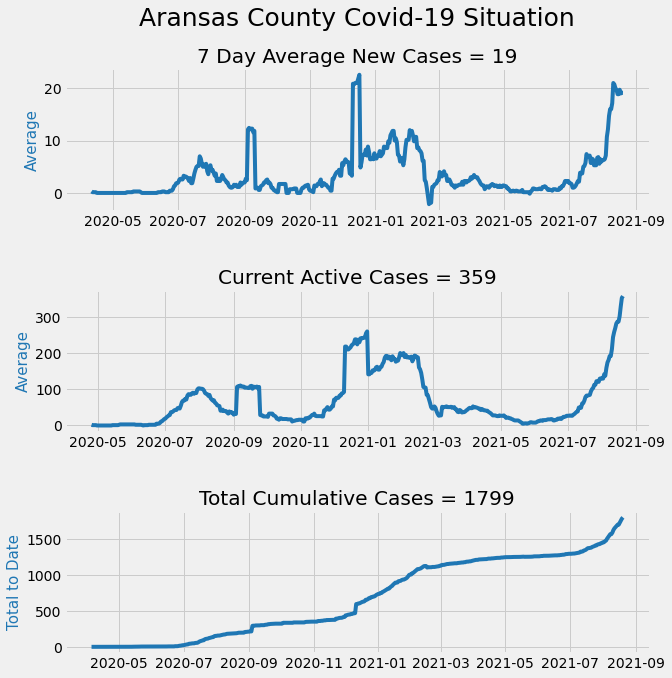

In [ ]:
plt.style.use('fivethirtyeight')
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10, 10))
#fig, (ax1, ax2, ax3) = plt.subplots(3, constrained_layout=True, figsize = (10, 10))

"""
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
"""

fig.subplots_adjust(top=0.1, wspace=0.5, hspace=0.2)

fig.tight_layout(pad=4)

fig.suptitle('Aransas County Covid-19 Situation', fontsize = 25, y=1.0)

x1 = recent['date'] 
y1 = recent['7 Day Average - New Cases']
x2 = recent['date']
y2 = recent['cases']
x3 = recent['date']
y3 = recent['Active']

last_y1 = round(recent['7 Day Average - New Cases'].iloc[-1])
last_y2 = round(recent['cases'].iloc[-1])
last_y3 = round(recent['Active'].iloc[-1])

color = 'tab:blue'
ax1.set_title('7 Day Average New Cases = ' + str(last_y1))
ax1.set_ylabel('Average', color=color, fontsize=15)
ax1.plot(x1, y1, color=color)
#ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2.set_title('Current Active Cases = ' + str(last_y3))
ax2.set_ylabel('Average', color=color, fontsize=15)
ax2.plot(x3, y3, color=color)
#ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax3.set_title('Total Cumulative Cases = '+ str(last_y2))
ax3.set_ylabel('Total to Date', color=color, fontsize=15)
ax3.plot(x2, y2, color=color)
#ax3.tick_params(axis='y', labelcolor=color)


In [ ]:
countydata

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
1650924,2021-08-24,Sweetwater,Wyoming,56037.0,5345,49.0
1650925,2021-08-24,Teton,Wyoming,56039.0,4265,11.0
1650926,2021-08-24,Uinta,Wyoming,56041.0,2810,14.0
1650927,2021-08-24,Washakie,Wyoming,56043.0,996,26.0


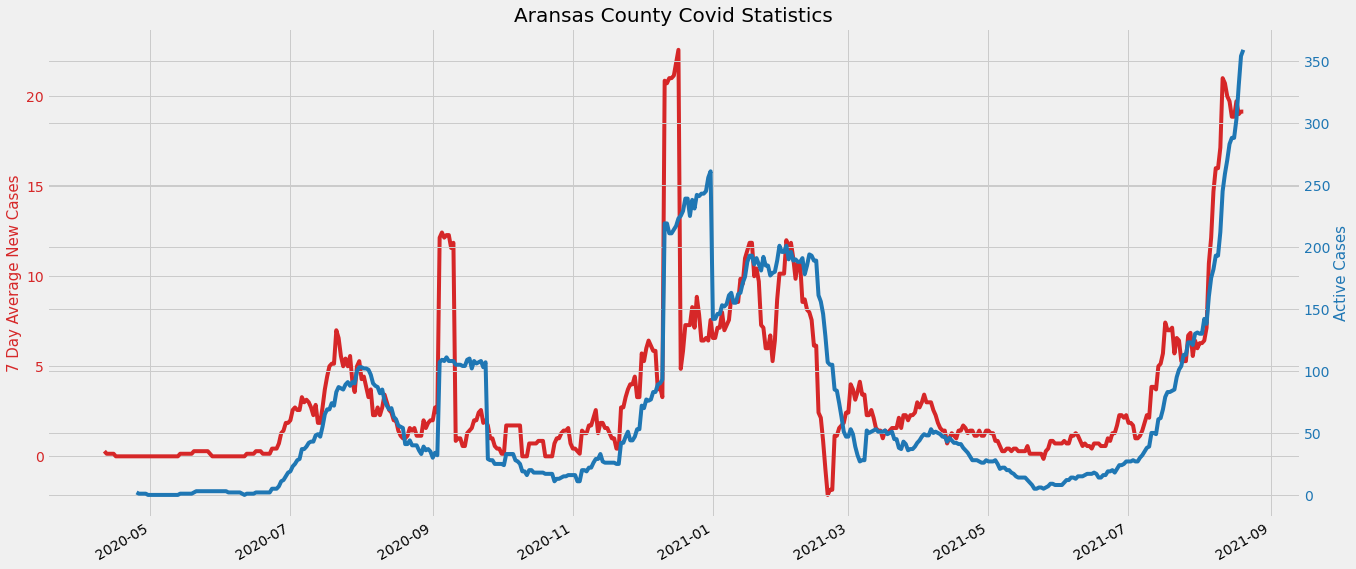

,date,county,state,cases,deaths,New Cases,New Deaths,7 Day Average - New Cases,Active
483,2021-08-01,Aransas,Texas,1454,43.0,12.0,0.0,6.285714,130.0
484,2021-08-02,Aransas,Texas,1454,43.0,0.0,0.0,6.285714,130.0
485,2021-08-03,Aransas,Texas,1468,43.0,14.0,0.0,6.428571,142.0
486,2021-08-04,Aransas,Texas,1477,43.0,9.0,0.0,7.142857,138.0
487,2021-08-05,Aransas,Texas,1503,45.0,26.0,2.0,10.714286,160.0
488,2021-08-06,Aransas,Texas,1525,46.0,22.0,1.0,12.142857,175.0
489,2021-08-07,Aransas,Texas,1545,46.0,20.0,0.0,14.714286,182.0
490,2021-08-08,Aransas,Texas,1566,46.0,21.0,0.0,16.000000,193.0
491,2021-08-09,Aransas,Texas,1566,46.0,0.0,0.0,16.000000,193.0
492,2021-08-10,Aransas,Texas,1588,46.0,22.0,0.0,17.142857,212.0


In [ ]:
# Plot the data
#plt.style.use('fivethirtyeight')

recent=[]
recent = localdata
recent.round({'7 Day Average - New Cases': 1})

#print the scatter chart
x = recent['date'] 
y = recent['7 Day Average - New Cases']
x2 = recent['date']
y2 = recent['cases']
x3 = recent['date']
y3 = recent['Active']

fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
#ax1.set_xlabel('Date')
ax1.set_ylabel('7 Day Average New Cases', color=color, fontsize=15)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# formatters' options for every 3rd month
months = MonthLocator(range(1, 13), bymonthday=1, interval=3)
monthsFmt = DateFormatter("%b %Y")
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(monthsFmt)
#ax1.grid(True)
fig.autofmt_xdate()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Active Cases', color=color, fontsize=15)  # we already handled the x-label with ax1
ax2.plot(x2, y3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

"""
ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax3.set_ylabel('Active Cases', color=color, fontsize=15)  # we already handled the x-label with ax1
ax3.plot(x3, y3, color=color)
ax3.tick_params(axis='y', labelcolor=color)
"""



plt.title('Aransas County Covid Statistics', fontsize=20)

plt.show()
recent.tail(20)

In [ ]:
recent.tail(20)

,date,county,state,cases,deaths,New Cases,New Deaths,7 Day Average - New Cases,Active
483,2021-08-01,Aransas,Texas,1454,43.0,12.0,0.0,6.285714,130.0
484,2021-08-02,Aransas,Texas,1454,43.0,0.0,0.0,6.285714,130.0
485,2021-08-03,Aransas,Texas,1468,43.0,14.0,0.0,6.428571,142.0
486,2021-08-04,Aransas,Texas,1477,43.0,9.0,0.0,7.142857,138.0
487,2021-08-05,Aransas,Texas,1503,45.0,26.0,2.0,10.714286,160.0
488,2021-08-06,Aransas,Texas,1525,46.0,22.0,1.0,12.142857,175.0
489,2021-08-07,Aransas,Texas,1545,46.0,20.0,0.0,14.714286,182.0
490,2021-08-08,Aransas,Texas,1566,46.0,21.0,0.0,16.000000,193.0
491,2021-08-09,Aransas,Texas,1566,46.0,0.0,0.0,16.000000,193.0
492,2021-08-10,Aransas,Texas,1588,46.0,22.0,0.0,17.142857,212.0


In [ ]:
localdata2 = mydata.query('state==@MYSTATE & county==@MYCOUNTY')

In [ ]:
localdata2


,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
33666,2020-04-05,USA-48007,Aransas,Texas,1,0.14,0.61,0,0.0,0.0
36123,2020-04-06,USA-48007,Aransas,Texas,0,0.14,0.61,0,0.0,0.0
38642,2020-04-07,USA-48007,Aransas,Texas,0,0.14,0.61,0,0.0,0.0
41208,2020-04-08,USA-48007,Aransas,Texas,0,0.14,0.61,0,0.0,0.0
43802,2020-04-09,USA-48007,Aransas,Texas,1,0.29,1.22,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1627244,2021-08-16,USA-48007,Aransas,Texas,0,18.86,80.21,0,0.0,0.0
1630493,2021-08-17,USA-48007,Aransas,Texas,28,19.71,83.85,0,0.0,0.0
1633742,2021-08-18,USA-48007,Aransas,Texas,31,19.00,80.82,0,0.0,0.0
1636991,2021-08-19,USA-48007,Aransas,Texas,25,19.14,81.42,0,0.0,0.0


In [ ]:
worst = mydata['cases_avg_per_100k'].max

In [ ]:
worst =mydata.loc[mydata['cases_avg_per_100k'].idxmax()]
worst

date                   2020-05-05
geoid                   USA-47169
county                  Trousdale
state                   Tennessee
cases                           4
cases_avg                     186
cases_avg_per_100k        1648.35
deaths                          1
deaths_avg                   0.14
deaths_avg_per_100k          1.27
Name: 116544, dtype: object